Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 5

##### Import packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Import some Sympy functions to solve for xi
from sympy.solvers import solve
from sympy import Symbol, N
X = Symbol('X', real = True)

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

## 5.2 - The Goodwin Model

### 5.2.1 - Three component system

Function to numerically integrate the Goodwin model equations.

In [3]:
def solve_Goodwin(f1, f2, f3, t_vals, initial, b, p):
    '''Solves N = 3 Goodwin model numerically. Assume t_vals is list of times, equally spaced from each other.'''
    
    # Create empty list to save calculated values, and save initial conditions
    x_vals = []; y_vals = []; z_vals = []
    x0 = initial[0]; y0 = initial[1]; z0 = initial[2];
    
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            x_vals.append(x0); y_vals.append(y0); z_vals.append(z0)
            
        else:
            # Compute next value: discretised derivative
            x_val = x_vals[-1] + f1(x_vals[-1], y_vals[-1], z_vals[-1], b, p)*DeltaT
            y_val = y_vals[-1] + f2(x_vals[-1], y_vals[-1], z_vals[-1], b)*DeltaT
            z_val = z_vals[-1] + f3(x_vals[-1], y_vals[-1], z_vals[-1], b)*DeltaT
            
            # Add to list
            x_vals.append(x_val); y_vals.append(y_val);  z_vals.append(z_val)
            
    return (x_vals, y_vals, z_vals)

Define a function to solve and find $\xi$ (makes use of Sympy, converts the result to a float number for computations and plots).

In [4]:
def find_xi(b, p):
    return float(N(solve(-1 + b*X + b*X**(p+1), X)[0]))

Define the right hand sides of the differential equations in the Goodwin Model:

In [5]:
def F1(x, y, z, b, p):
    '''x dot in Goodwin model'''
    return 1/(1+z**p) - b*x

In [6]:
def F2(x, y, z, b):
    '''y dot in Goodwin model'''
    return b*(x - y)

In [7]:
def F3(x, y, z, b):
    '''z dot in Goodwin model'''
    return b*(y - z)

For $F_1$, we define both terms seperately as well (for figures).

In [8]:
def F1_plus(x, y, z, b, p):
    return 1/(1+z**p)

In [9]:
def F1_minus(x, y, z, b):
    return b*x

$ \textbf{Plot the } F_+ \textbf{ and } F_- \textbf{ intersection point (fixed point)} $

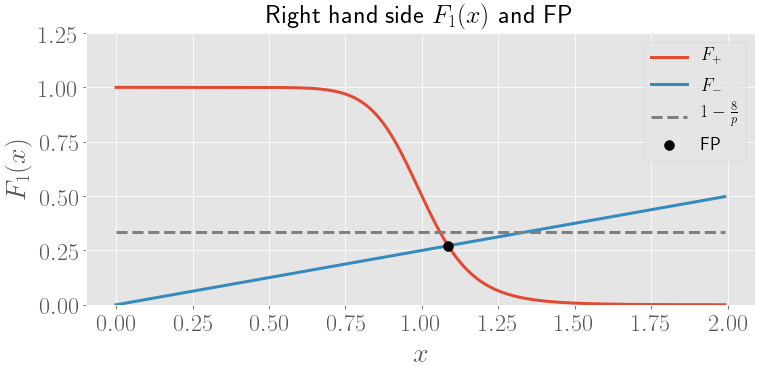

In [10]:
plt.figure(figsize = (12, 5))

# Our choice of parameters:
b = 0.25; p = 12

# Get values
x_vals = np.arange(0, 2, 0.01)

F1_plus_vals = F1_plus(x_vals, 0, x_vals, b, p)
F1_minus_vals = F1_minus(x_vals, 0, x_vals, b)

# Find the coordinates of the fixed point
xi = find_xi(b, p)

# Plot the functions and their intersection:
plt.plot(x_vals, F1_plus_vals, label = r'$F_+$')
plt.plot(x_vals, F1_minus_vals, label = r'$F_-$')

plt.scatter(xi, b*xi, color = 'black', zorder = 10, label = 'FP')

# Plot condition for Hopf bifurcation
if p > 8:
    plt.plot(x_vals, [1 - 8/p for x in x_vals], '--', color = 'grey', label = r'$1-\frac{8}{p}$')

# Make fancy, save and show    
plt.legend(fontsize = 18)
plt.ylim(0, 1.25)
plt.xlabel(r'$x$')
plt.ylabel(r'$F_1(x)$')
plt.title(r'Right hand side $F_1(x)$ and FP')
#plt.savefig('F1plot.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Look at solutions} $ 

To get inspiration for initial conditions, let us print the coordinates of the fixed point with the above parameters:

In [11]:
print('FP lies at %0.4f' % xi)

FP lies at 1.0858


Define a function which plots the three projections ($xy$, $yz$, $xz$) of solutions: this will make the code more readable and adaptable. 

In [12]:
def plot_Goodwin_solutions(x, y, z):
    '''Plots the three projections of (x,y,z) solutions of the Goodwin model.'''
    
    # xy plane
    ax1.plot(x, y, color = 'red')
    ax1.scatter(x[0], y[0], color = 'red')
    ax1.scatter(xi, xi, color = 'black', zorder = 10)

    # yz plane
    ax2. plot(y, z, color = 'blue')
    ax2. scatter(y[0], z[0], color = 'blue')
    ax2. scatter(xi, xi, color = 'black', zorder = 10)

    # xz plane
    ax3. plot(x, z, color = 'orange')
    ax3. scatter(x[0], z[0], color = 'orange')
    ax3. scatter(xi, xi, color = 'black', zorder = 10)

Plot the full solutions for a few initial conditions:

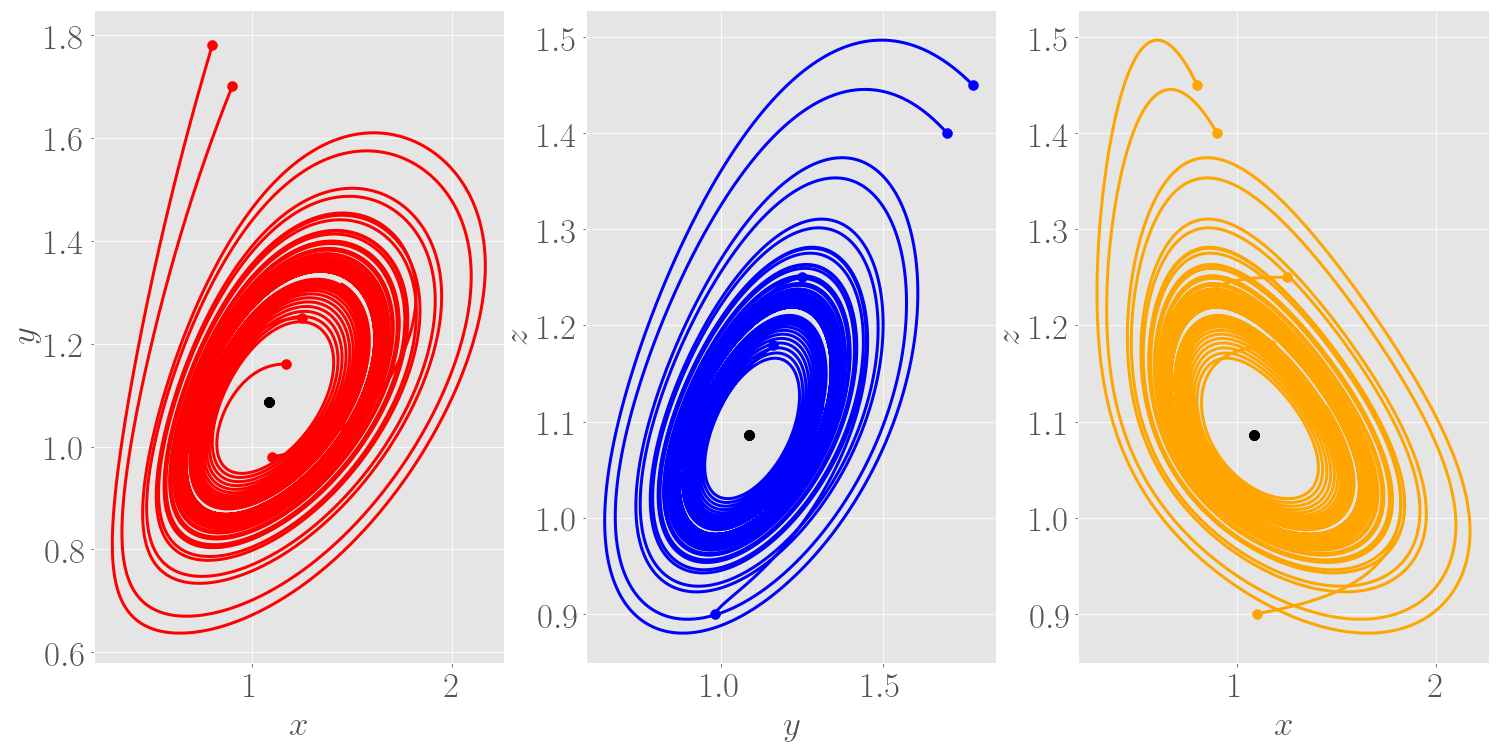

In [13]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (25, 12))

t_vals = np.arange(0, 200, 0.0001)

initial_conditions = [(1.1, 0.98, 0.9), (1.17, 1.16, 1.18), (1.25, 1.25, 1.25), (0.9, 1.7, 1.4), (0.8, 1.78, 1.45)]

for initial in initial_conditions:
    x, y, z = solve_Goodwin(F1, F2, F3, t_vals, initial, b, p)
    
    # Note: this plot function is defined above, and plots the three projections on three axes
    plot_Goodwin_solutions(x, y, z)


# Make fancy, save and show

f = 35 # fontsize, since the plots are big
ax1.set_xlabel(r'$x$', fontsize = f)
ax1.set_ylabel(r'$y$', fontsize = f)

ax2.set_xlabel(r'$y$', fontsize = f)
ax2.set_ylabel(r'$z$', fontsize = f)

ax3.set_xlabel(r'$x$', fontsize = f)
ax3.set_ylabel(r'$z$', fontsize = f)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis = 'x', labelsize = f)
    ax.tick_params(axis = 'y', labelsize = f)

#plt.savefig('Goodwin_solutions.pdf', bbox_inches = 'tight')
plt.show()

Now, plot the second half of the solution such that the limit cycle appears more clearly.

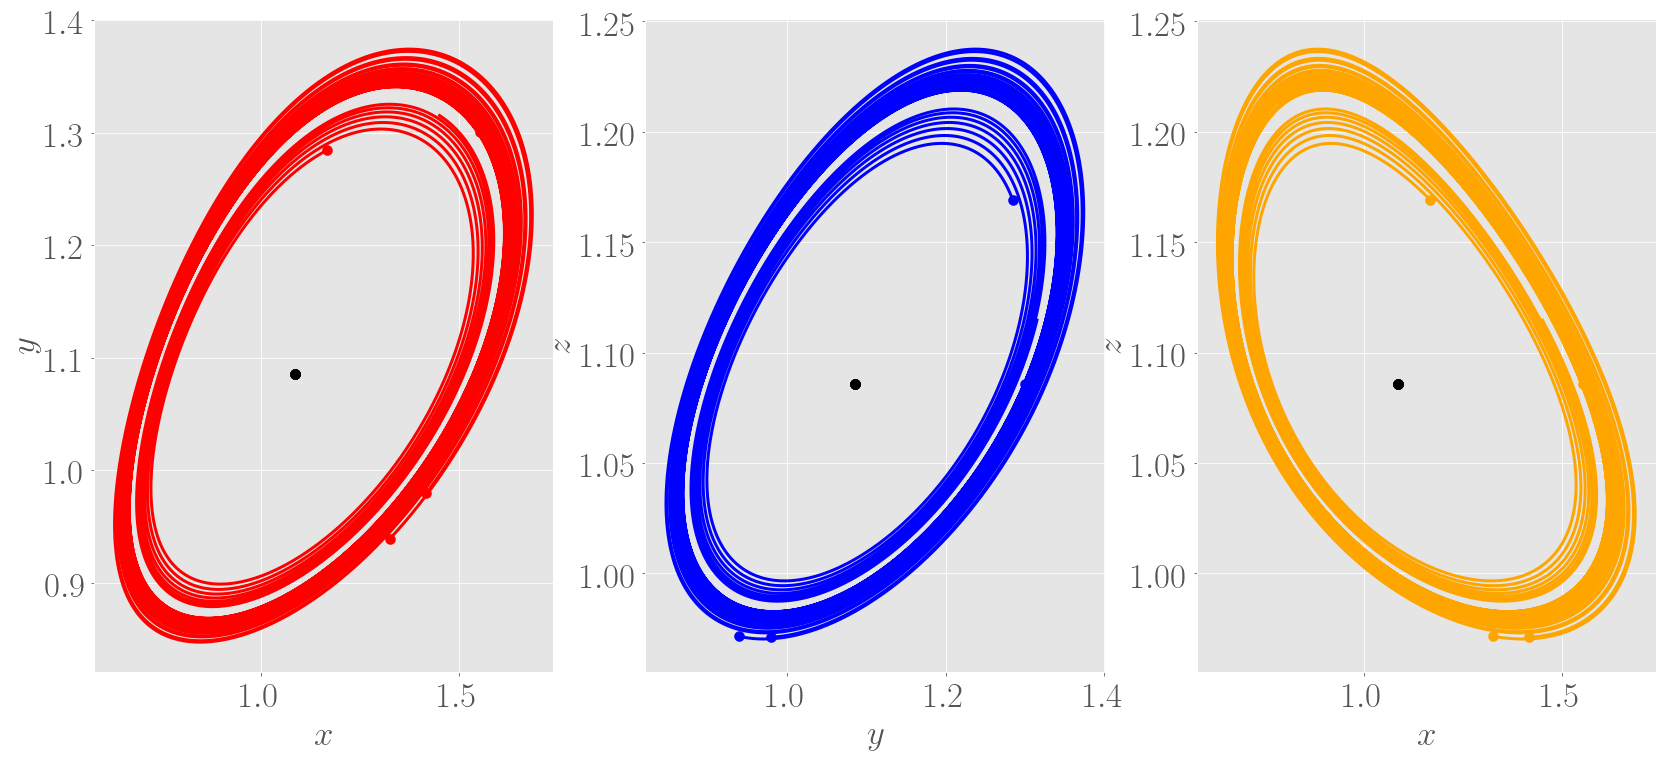

In [14]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (28, 12))

t_vals = np.arange(0, 200, 0.0001)

initial_conditions = [(1.1, 0.98, 0.9), (1.17, 1.16, 1.18), (1.25, 1.25, 1.25), (0.9, 1.7, 1.4), (0.8, 1.78, 1.45)]

for initial in initial_conditions:
    x, y, z = solve_Goodwin(F1, F2, F3, t_vals, initial, b, p)
    
    # Note, I plot only the second half of the solutions: I let the system 'equilibrate' for some time    
    plot_Goodwin_solutions(x[len(x)//2:], y[len(x)//2:], z[len(x)//2:])


# Make fancy, save and show

f = 35 # fontsize, since the plots are big
ax1.set_xlabel(r'$x$', fontsize = f)
ax1.set_ylabel(r'$y$', fontsize = f)

ax2.set_xlabel(r'$y$', fontsize = f)
ax2.set_ylabel(r'$z$', fontsize = f)

ax3.set_xlabel(r'$x$', fontsize = f)
ax3.set_ylabel(r'$z$', fontsize = f)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis = 'x', labelsize = f)
    ax.tick_params(axis = 'y', labelsize = f)

#plt.savefig('Goodwin_solutions_second_half.pdf', bbox_inches = 'tight')
plt.show()

### 5.2.2 - $N$ component systems

For the $N$-component system, we found the requirement $$ p > \frac{1}{\cos^N\left( \frac{\pi}{N}\right)} \, . $$ We now plot this to see how this behaves as a function of $N$.

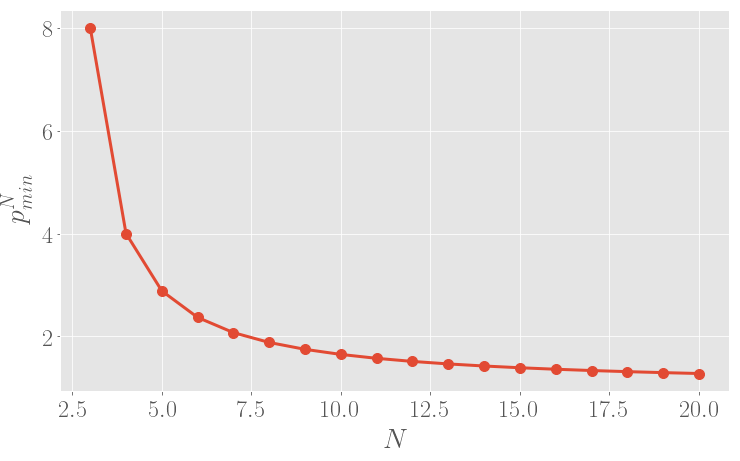

In [15]:
plt.figure(figsize = (12, 7))

N_vals = np.arange(3, 21, 1)
y_vals = [(np.cos(np.pi/N))**(-N) for N in N_vals]

plt.plot(N_vals, y_vals, '-o', markersize = 10)

plt.xlabel(r'$N$')
plt.ylabel(r'$p_{min}^N$')
#plt.savefig('p_ifo_N.pdf', bbox_inches = 'tight')
plt.show()